In [1]:
import numpy as np
import pandas as pd

[beyondpesticides.org](https://www.beyondpesticides.org/resources/mosquitos-and-insect-borne-diseases/documents/the-truth-about-mosquitoes,-pesticides-and-west-nile-virus)

Pesticides not useful

In [2]:
# KAGGLE 
# PRIVATE - 0.67480
# PUBLIC - 0.68689

In [3]:
combined = pd.read_csv('../../data/combined_kev.csv')

In [4]:
combined.columns

Index(['date', 'species', 'wnvpresent', 'trap', 'latitude', 'longitude',
       'species_ord', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb',
       'heat', 'cool', 'sunrise', 'sunset', 'preciptotal', 'stnpressure',
       'sealevel', 'resultspeed', 'resultdir', 'avgspeed', 'BC', 'HZ', 'DZ',
       'VC', 'SQ', 'TS', 'RA', 'GR', 'MI', 'BR', 'FU', 'FG+', 'FG', 'SN',
       'rel_humid', 'tavg_change', 'tavg_lag5', 'tavg_lag14', 'tavg_lag28',
       'rel_humid_lag5', 'rel_humid_lag14', 'rel_humid_lag28', 'avgspeed_lag5',
       'avgspeed_lag14', 'avgspeed_lag28', 'preciptotal_lag5',
       'preciptotal_lag14', 'preciptotal_lag28', 'week_number'],
      dtype='object')

In [5]:
spray = pd.read_csv('../../data/spray.csv')

In [6]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [7]:
spray.shape

(14835, 4)

In [8]:
spray[spray['Latitude']>42.3].head(100)

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858
...,...,...,...,...
90,2011-08-29,7:14:38 PM,42.392902,-88.093853
91,2011-08-29,7:14:48 PM,42.392587,-88.093867
92,2011-08-29,7:14:58 PM,42.392308,-88.093873
93,2011-08-29,7:15:18 PM,42.392183,-88.093767


In [9]:
spray.drop(spray.index[list(range(95))], inplace=True)

In [10]:
spray

,Date,Time,Latitude,Longitude
95,2011-09-07,7:52:52 PM,41.981433,-87.787777
96,2011-09-07,7:53:02 PM,41.980998,-87.787778
97,2011-09-07,7:53:12 PM,41.980560,-87.787762
98,2011-09-07,7:53:22 PM,41.980198,-87.787758
99,2011-09-07,7:53:32 PM,41.979752,-87.787765
...,...,...,...,...
14830,2013-09-05,8:34:11 PM,42.006587,-87.812355
14831,2013-09-05,8:35:01 PM,42.006192,-87.816015
14832,2013-09-05,8:35:21 PM,42.006022,-87.817392
14833,2013-09-05,8:35:31 PM,42.005453,-87.817423


In [11]:
spray['Date']  = pd.to_datetime(spray['Date'], format = '%Y-%m-%d')

In [12]:
spray['year'] = spray.Date.dt.year
spray.head()

,Date,Time,Latitude,Longitude,year
95,2011-09-07,7:52:52 PM,41.981433,-87.787777,2011
96,2011-09-07,7:53:02 PM,41.980998,-87.787778,2011
97,2011-09-07,7:53:12 PM,41.980560,-87.787762,2011
98,2011-09-07,7:53:22 PM,41.980198,-87.787758,2011
99,2011-09-07,7:53:32 PM,41.979752,-87.787765,2011


In [13]:
spray[spray['year']==2011]

,Date,Time,Latitude,Longitude,year
95,2011-09-07,7:52:52 PM,41.981433,-87.787777,2011
96,2011-09-07,7:53:02 PM,41.980998,-87.787778,2011
97,2011-09-07,7:53:12 PM,41.980560,-87.787762,2011
98,2011-09-07,7:53:22 PM,41.980198,-87.787758,2011
99,2011-09-07,7:53:32 PM,41.979752,-87.787765,2011
...,...,...,...,...,...
2204,2011-09-07,9:40:30 PM,41.990155,-87.817828,2011
2205,2011-09-07,9:40:40 PM,41.989638,-87.817857,2011
2206,2011-09-07,9:40:50 PM,41.989088,-87.817867,2011
2207,2011-09-07,9:41:00 PM,41.988812,-87.817618,2011


In [14]:
train = pd.read_csv('../../data/train.csv')
train['Date']  = pd.to_datetime(train['Date'], format = '%Y-%m-%d')
train['year'] = train.Date.dt.year

In [15]:
train[train['year']==2011].head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,year
6060,2011-06-10,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX TERRITANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0,2011


In [16]:
train['Date'].unique()

array(['2007-05-29T00:00:00.000000000', '2007-06-05T00:00:00.000000000',
       '2007-06-26T00:00:00.000000000', '2007-06-29T00:00:00.000000000',
       '2007-07-02T00:00:00.000000000', '2007-07-11T00:00:00.000000000',
       '2007-07-18T00:00:00.000000000', '2007-07-19T00:00:00.000000000',
       '2007-07-25T00:00:00.000000000', '2007-07-27T00:00:00.000000000',
       '2007-08-01T00:00:00.000000000', '2007-08-02T00:00:00.000000000',
       '2007-08-03T00:00:00.000000000', '2007-08-07T00:00:00.000000000',
       '2007-08-08T00:00:00.000000000', '2007-08-09T00:00:00.000000000',
       '2007-08-15T00:00:00.000000000', '2007-08-16T00:00:00.000000000',
       '2007-08-17T00:00:00.000000000', '2007-08-21T00:00:00.000000000',
       '2007-08-22T00:00:00.000000000', '2007-08-24T00:00:00.000000000',
       '2007-08-28T00:00:00.000000000', '2007-09-04T00:00:00.000000000',
       '2007-09-05T00:00:00.000000000', '2007-09-06T00:00:00.000000000',
       '2007-09-12T00:00:00.000000000', '2007-09-18

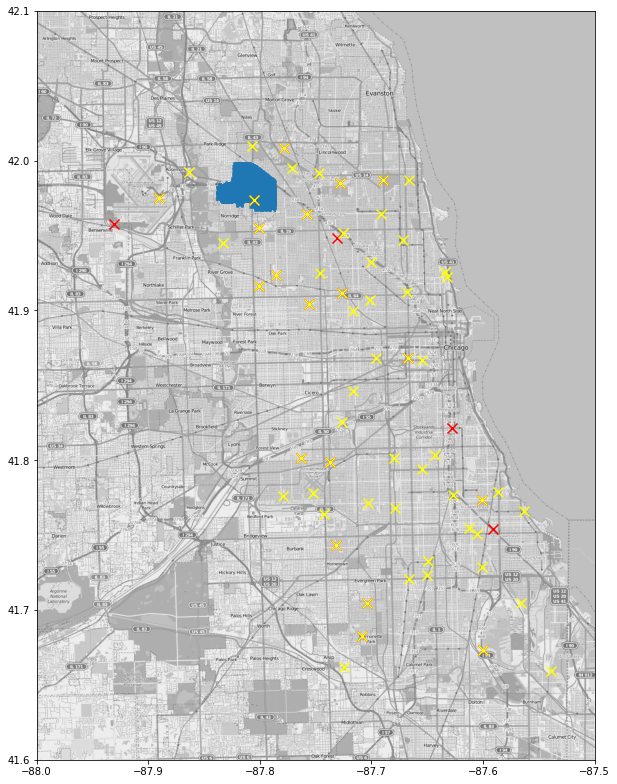

In [38]:
# Code is borrowed from: https://www.kaggle.com/users/213536/vasco/predict-west-nile-virus/west-nile-heatmap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# Remove this when copying to a script on Kaggle:

mapdata = np.loadtxt("../../data/mapdata_copyright_openstreetmap_contributors.txt")
spray11 = spray[spray['year']==2011][['Date','Longitude', 'Latitude']]
train11 = train[(train['year']==2011)&(train['WnvPresent']==1)][['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]
train13 = train[(train['year']==2013)&(train['WnvPresent']==1)][['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]


aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations = spray11[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')

locs11 = train11[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locs11[:,0], locs11[:,1], marker='x', alpha=1, color='red', s=100)

locs13 = train13[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locs13[:,0], locs13[:,1], marker='x', alpha=1, color='yellow', s=100)

# Add this when copying to a script on Kaggle:
#plt.savefig('heatmap.png')

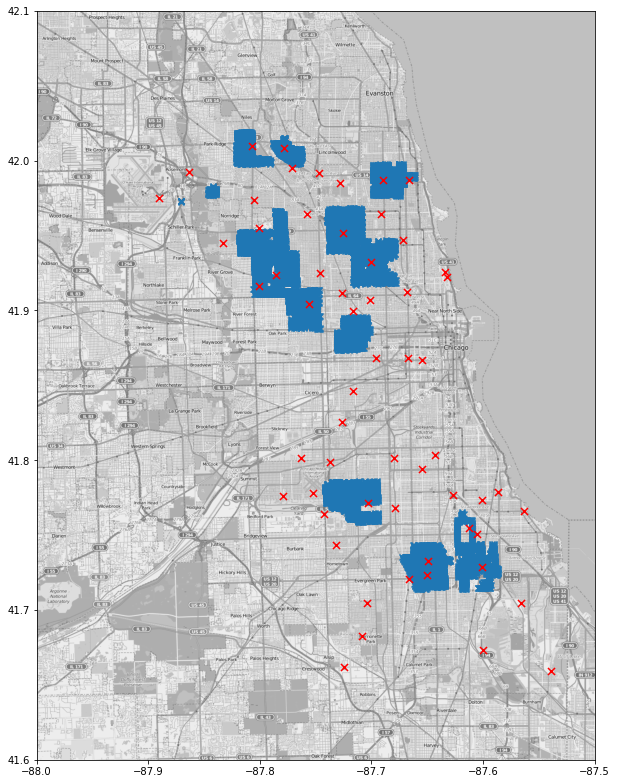

In [36]:
# Code is borrowed from: https://www.kaggle.com/users/213536/vasco/predict-west-nile-virus/west-nile-heatmap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# Remove this when copying to a script on Kaggle:

mapdata = np.loadtxt("../../data/mapdata_copyright_openstreetmap_contributors.txt")
spray11 = spray[spray['year']==2013][['Date','Longitude', 'Latitude']]
train11 = train[(train['year']==2011)&(train['WnvPresent']==1)][['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]
train13 = train[(train['year']==2013)&(train['WnvPresent']==1)][['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]


aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations = spray11[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')

locs11 = train11[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locs11[:,0], locs11[:,1], marker='x', alpha=1, color='red', s=50)

locs13 = train13[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locs13[:,0], locs13[:,1], marker='x', alpha=1, color='red', s=50)

# Add this when copying to a script on Kaggle:
#plt.savefig('heatmap.png')

In [25]:
train13.shape

(239, 5)